In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_AN_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4,130.0,322,0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,0.0,67.0,3,115.0,564,0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,1.0,57.0,2,124.0,261,0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,64.0,4,128.0,263,0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,0.0,74.0,2,120.0,269,0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3,172.0,199,1,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,44.0,2,120.0,263,0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2,140.0,294,0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,4,140.0,192,0,0.0,148.0,0.0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	1
float64		column 2	1
int64		column 3	0
float64		column 4	1
int64		column 5	0
int64		column 6	0
float64		column 7	1
float64		column 8	2
float64		column 9	4
float64		column 10	3
float64		column 11	6
float64		column 12	3
float64		column 13	2


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,269.000000,269.000000,270.000000,269.000000,270.000000,270.000000,269.000000,268.000000,266.000000,267.000000,264.000000,267.000000,268.000000
mean,0.676580,54.431227,3.174074,131.386617,249.659259,0.148148,1.026022,149.503731,0.330827,1.033333,1.587121,0.677903,4.708955
std,0.468653,9.125979,0.950090,17.881429,51.686237,0.355906,0.997792,23.159842,0.471398,1.113845,0.610417,0.946501,1.942332
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,213.000000,0.000000,0.000000,132.750000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,280.000000,0.000000,2.000000,165.250000,1.000000,1.600000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

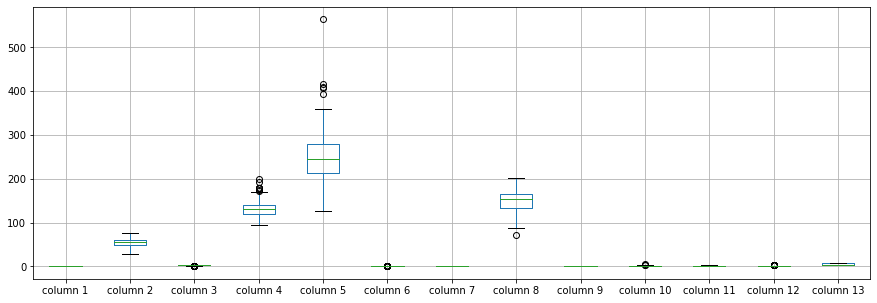

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.676580
column 2      54.431227
column 3       3.174074
column 4     131.386617
column 5     249.659259
column 6       0.148148
column 7       1.026022
column 8     149.503731
column 9       0.330827
column 10      1.033333
column 11      1.587121
column 12      0.677903
column 13      4.708955
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.091066,0.040950,-0.067757,-0.199665,0.043261,0.044790,-0.081761,0.173410,0.082625,0.046919,0.083883,0.395718
column 2,-0.091066,1.000000,0.096855,0.273975,0.220369,0.123595,0.124450,-0.397392,0.101601,0.202301,0.156855,0.356906,0.098160
column 3,0.040950,0.096855,1.000000,-0.041225,0.090465,-0.098537,0.077910,-0.310973,0.364407,0.156581,0.128122,0.221298,0.266057
column 4,-0.067757,0.273975,-0.041225,1.000000,0.179306,0.154861,0.118523,-0.039983,0.082941,0.219299,0.147370,0.085364,0.134095
column 5,-0.199665,0.220369,0.090465,0.179306,1.000000,0.025186,0.167785,-0.012291,0.078565,0.034811,0.008925,0.132064,0.026509
column 6,0.043261,0.123595,-0.098537,0.154861,0.025186,1.000000,0.052026,0.025752,0.002208,-0.020138,0.054357,0.129784,0.046676
column 7,0.044790,0.124450,0.077910,0.118523,0.167785,0.052026,1.000000,-0.070094,0.101984,0.135784,0.176717,0.115432,0.007239
column 8,-0.081761,-0.397392,-0.310973,-0.039983,-0.012291,0.025752,-0.070094,1.000000,-0.387882,-0.344511,-0.370767,-0.257209,-0.256034
column 9,0.173410,0.101601,0.364407,0.082941,0.078565,0.002208,0.101984,-0.387882,1.000000,0.261171,0.256929,0.157732,0.309314
column 10,0.082625,0.202301,0.156581,0.219299,0.034811,-0.020138,0.135784,-0.344511,0.261171,1.000000,0.604449,0.272825,0.320652


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+54,13+54+54,13+54+54+54,13+54+54+54+54,13+54+54+54+54+54,13+54+54+54+54,13+54+54+54,13+54+54,13+54,13], vae_layer = False, seed = 54)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 607.1512718200684
Epoch: 1 , loss: 608.1605415344238
Epoch: 2 , loss: 607.1850051879883
Epoch: 3 , loss: 608.4513168334961
Epoch: 4 , loss: 608.3051414489746
Epoch: 5 , loss: 607.6557579040527
Epoch: 6 , loss: 607.5835952758789
Epoch: 7 , loss: 607.0743827819824
Epoch: 8 , loss: 606.4416542053223
Epoch: 9 , loss: 608.3843650817871
Epoch: 10 , loss: 605.9591102600098
Epoch: 11 , loss: 608.7379722595215
Epoch: 12 , loss: 607.6433715820312
Epoch: 13 , loss: 607.1552200317383
Epoch: 14 , loss: 607.5662727355957
Epoch: 15 , loss: 605.1531105041504
Epoch: 16 , loss: 605.6875
Epoch: 17 , loss: 606.8511428833008
Epoch: 18 , loss: 604.5099906921387
Epoch: 19 , loss: 601.9552726745605
Epoch: 20 , loss: 598.3282318115234
Epoch: 21 , loss: 594.7209663391113
Epoch: 22 , loss: 590.9278717041016
Epoch: 23 , loss: 587.5204277038574
Epoch: 24 , loss: 578.9305610656738
Epoch: 25 , loss: 555.6451873779297
Epoch: 26 , los

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.0
column 2      48.0
column 3       2.0
column 4     130.0
column 5     245.0
column 6       0.0
column 7       2.0
column 8     180.0
column 9       0.0
column 10      0.2
column 11      2.0
column 12      0.0
column 13      3.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
267,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(153.00209021854508, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.028256525715914152

In [18]:
new_df.iloc[66,:]

column 1       1.0
column 2      51.0
column 3       4.0
column 4     140.0
column 5     261.0
column 6       0.0
column 7       2.0
column 8     186.0
column 9       1.0
column 10      0.0
column 11      1.0
column 12      0.0
column 13      3.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4,130.0,322,0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,0.0,67.0,3,115.0,564,0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,1.0,57.0,2,124.0,261,0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,64.0,4,128.0,263,0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,0.0,74.0,2,120.0,269,0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3,172.0,199,1,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,44.0,2,120.0,263,0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2,140.0,294,0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,4,140.0,192,0,0.0,148.0,0.0,0.4,2.0,0.0,6.0


In [20]:
imputations[-1].to_excel("Sheart_AN_1(imp).xlsx", index=False, header=False)